### Import necessary libraries

In [38]:
import pandas as pd

# 1. Data Collection and Manipulation

## 1.1 Automatic Download of Dataset

In [39]:
!wget -q http://files.grouplens.org/datasets/movielens/ml-1m.zip

zsh:1: command not found: wget


In [40]:
!unzip -q ml-1m.zip

unzip:  cannot find or open ml-1m.zip, ml-1m.zip.zip or ml-1m.zip.ZIP.


## 1.2 Save to csv files

In [41]:
 # Load the users file and save to CSV
users = pd.read_csv('../../data/processed/users.csv')

# Load the movies file and save to CSV
movies = pd.read_csv('../../data/processed/movies.csv')

# Load the ratings file and save to CSV
ratings = pd.read_csv('../../data/processed/ratings.csv')

## 1.3 Print the first few rows of the each dataframe

In [42]:
# Print the first few rows of the users dataframe to check user details like user ID and demographics
print("First few rows of the users dataframe:")
print(users.head())
print("\n")  # Adds a newline for better separation of the output

# Print the first few rows of the movies dataframe to view movie information such as movie ID and title
print("First few rows of the movies dataframe:")
print(movies.head())
print("\n")  # Adds a newline for better separation of the output

# Print the first few rows of the ratings dataframe to inspect entries of user ratings for movies
print("First few rows of the ratings dataframe:")
print(ratings.head())

First few rows of the users dataframe:
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


First few rows of the movies dataframe:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


First few rows of the ratings dataframe:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3   

## 1.4 Print the column names of the each dataframe

In [43]:
# Print the column names of the users dataframe to understand the fields related to user information
print("Column names in the users dataframe:")
print(users.columns)
print("\n")  # Adds a newline for better separation of the output

# Print the column names of the movies dataframe to see the attributes associated with movies, such as titles and genres
print("Column names in the movies dataframe:")
print(movies.columns)
print("\n")  # Adds a newline for better separation of the output

# Print the column names of the ratings dataframe to review the fields that link users and movies through ratings
print("Column names in the ratings dataframe:")
print(ratings.columns)

Column names in the users dataframe:
Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')


Column names in the movies dataframe:
Index(['MovieID', 'Title', 'Genres'], dtype='object')


Column names in the ratings dataframe:
Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')


## 1.5 Checking for missing values in each dataframe

In [44]:
# Display the number of missing values in each column of the users dataframe
print("Missing values in the users dataframe:")
print(users.isnull().sum())
print("\n")  # Adds a newline for better separation of output

# Display the number of missing values in each column of the movies dataframe
print("Missing values in the movies dataframe:")
print(movies.isnull().sum())
print("\n")  # Adds a newline for better separation of output

# Display the number of missing values in each column of the ratings dataframe
print("Missing values in the ratings dataframe:")
print(ratings.isnull().sum())

Missing values in the users dataframe:
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


Missing values in the movies dataframe:
MovieID    0
Title      0
Genres     0
dtype: int64


Missing values in the ratings dataframe:
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


## 1.6 Convert the 'Timestamp' column in the ratings dataframe from Unix time to datetime format.

In [45]:
# This enhances readability and usability of the timestamp data for further analysis.
ratings['Timestamp'] = pd.to_datetime(ratings['Timestamp'], unit='s')

# Display the first few rows of the ratings dataframe to confirm the successful conversion of the 'Timestamp' column.
print("First few rows of the ratings dataframe after converting 'Timestamp':")
print(ratings.head())

First few rows of the ratings dataframe after converting 'Timestamp':
   UserID  MovieID  Rating           Timestamp
0       1     1193       5 2000-12-31 22:12:40
1       1      661       3 2000-12-31 22:35:09
2       1      914       3 2000-12-31 22:32:48
3       1     3408       4 2000-12-31 22:04:35
4       1     2355       5 2001-01-06 23:38:11


## 1.7  Merge the ratings dataframe with the movies dataframe on the MovieID column.


In [46]:
# This step combines movie rating data with corresponding movie details.
merged_data = pd.merge(ratings, movies, on='MovieID')

# Further merge the resulting dataframe with the users dataframe on the UserID column.
# This addition includes user demographic details into the merged dataset.
merged_data = pd.merge(merged_data, users, on='UserID')

# Display the column names of the merged dataframe to verify successful merges and to understand the available data fields.
print("Columns in the merged dataframe:")
print(merged_data.columns)

Columns in the merged dataframe:
Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Title', 'Genres', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')


## 1.6 Removing Duplicates

In [47]:
dup_bool = merged_data.duplicated(['UserID','MovieID','Rating','Timestamp'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


## 3.4 Matrix Factorization

###3.4.1 Matrix factorization using SVD




In [48]:
from surprise import Dataset, Reader, KNNWithMeans, SVD, accuracy
from surprise.model_selection import train_test_split

In [49]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(merged_data[['UserID','MovieID','Rating']], reader)

# Split into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

In [50]:
algo_svd = SVD()
algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)

In [51]:
predictions_svd

[Prediction(uid=3007, iid=2533, r_ui=2.0, est=2.571656951290436, details={'was_impossible': False}),
 Prediction(uid=2566, iid=1917, r_ui=4.0, est=3.518781118320961, details={'was_impossible': False}),
 Prediction(uid=4809, iid=1230, r_ui=4.0, est=4.568640660119852, details={'was_impossible': False}),
 Prediction(uid=4543, iid=3169, r_ui=4.0, est=3.6548814996937407, details={'was_impossible': False}),
 Prediction(uid=2784, iid=3418, r_ui=3.0, est=3.556765086893468, details={'was_impossible': False}),
 Prediction(uid=2012, iid=3633, r_ui=3.0, est=3.44926917532428, details={'was_impossible': False}),
 Prediction(uid=4621, iid=592, r_ui=4.0, est=3.453351580195406, details={'was_impossible': False}),
 Prediction(uid=4165, iid=1175, r_ui=5.0, est=3.8003967414525195, details={'was_impossible': False}),
 Prediction(uid=1176, iid=3196, r_ui=4.0, est=4.351965031365238, details={'was_impossible': False}),
 Prediction(uid=1109, iid=2987, r_ui=5.0, est=3.3594381596132736, details={'was_impossible'

In [52]:
print("SVD RMSE:")
accuracy.rmse(predictions_svd)

SVD RMSE:
RMSE: 0.8776


0.8775717267809563

In [53]:
user_id = 1
movie_id = 1193
prediction_svd = algo_svd.predict(user_id, movie_id)
print(f"Prediction for User {user_id} on Movie {movie_id} (SVD):")
print(prediction_svd)

Prediction for User 1 on Movie 1193 (SVD):
user: 1          item: 1193       r_ui = None   est = 4.53   {'was_impossible': False}


In [54]:
from surprise import accuracy

# Calculate and print MAE for SVD predictions
mae_svd = accuracy.mae(predictions_svd)
print(f"SVD MAE: {mae_svd:.4f}")

MAE:  0.6893
SVD MAE: 0.6893


In [55]:
from collections import defaultdict

# Function to categorize predictions as relevant or not
def precision_recall(predictions, threshold=3.5):
    # Store true positives, predicted positives, and relevant positives
    user_results = defaultdict(lambda: {'tp': 0, 'fp': 0, 'fn': 0})

    for uid, iid, true_r, est, _ in predictions:
        relevant = true_r >= threshold
        predicted_relevant = est >= threshold

        if predicted_relevant and relevant:
            user_results[uid]['tp'] += 1
        elif predicted_relevant and not relevant:
            user_results[uid]['fp'] += 1
        elif not predicted_relevant and relevant:
            user_results[uid]['fn'] += 1

    # Calculate precision and recall per user and overall averages
    precision_list = []
    recall_list = []

    for uid, results in user_results.items():
        tp = results['tp']
        fp = results['fp']
        fn = results['fn']

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)

    avg_precision = sum(precision_list) / len(precision_list)
    avg_recall = sum(recall_list) / len(recall_list)

    return avg_precision, avg_recall

# Calculate precision and recall using predictions
precision, recall = precision_recall(predictions_svd)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.7383
Recall: 0.7676


In [56]:
# Function to calculate DCG (Discounted Cumulative Gain)
def dcg_at_k(scores, k):
    scores = np.array(scores)[:k]
    return np.sum((2**scores - 1) / np.log2(np.arange(2, scores.size + 2)))

# Function to calculate NDCG
def ndcg_at_k(predictions, k=10):
    user_ndcgs = []

    # Group predictions by user
    user_ratings = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_ratings[uid].append((true_r, est))

    for uid, ratings in user_ratings.items():
        # Sort by predicted score
        sorted_ratings = sorted(ratings, key=lambda x: x[1], reverse=True)

        # Get the true relevance scores for DCG and IDCG
        true_relevance = [true_r for true_r, _ in sorted_ratings]

        # DCG calculation
        dcg = dcg_at_k(true_relevance, k)
        # IDCG calculation (Ideal DCG - sort by true ratings)
        ideal_relevance = sorted(true_relevance, reverse=True)
        idcg = dcg_at_k(ideal_relevance, k)

        # NDCG calculation
        ndcg = dcg / idcg if idcg > 0 else 0
        user_ndcgs.append(ndcg)

    # Average NDCG across users
    avg_ndcg = np.mean(user_ndcgs)
    return avg_ndcg

# Calculate NDCG using predictions
ndcg = ndcg_at_k(predictions_svd, k=10)
print(f"NDCG@10: {ndcg:.4f}")


NDCG@10: 0.8115


In [57]:
from surprise import Dataset, Reader, NMF, accuracy
from surprise.model_selection import train_test_split


In [58]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(merged_data[['UserID', 'MovieID', 'Rating']], reader)

# Split into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

In [59]:
# Initialize and train the NMF algorithm
algo_nmf = NMF()
algo_nmf.fit(trainset)

In [60]:
# Test the NMF algorithm on the test set
predictions_nmf = algo_nmf.test(testset)

In [61]:
# Evaluate RMSE for NMF
print("NMF RMSE:")
accuracy.rmse(predictions_nmf)

NMF RMSE:
RMSE: 0.9204


0.920395694140712

In [62]:
# Example prediction for a specific user and movie
user_id = 1
movie_id = 1193
prediction_nmf = algo_nmf.predict(user_id, movie_id)
print(f"Prediction for User {user_id} on Movie {movie_id} (NMF):")
print(prediction_nmf)

Prediction for User 1 on Movie 1193 (NMF):
user: 1          item: 1193       r_ui = None   est = 4.65   {'was_impossible': False}


In [63]:
from collections import defaultdict
import numpy as np

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """
    Calculate precision and recall at k for each user.

    Args:
    predictions: list of (user, item, true rating, predicted rating, details).
    k: Number of top predictions to consider.
    threshold: Minimum rating to consider an item relevant.

    Returns:
    avg_precision: Mean precision at k across all users.
    avg_recall: Mean recall at k across all users.
    """
    user_ratings = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_ratings[uid].append((true_r, est))

    precisions = []
    recalls = []

    for uid, ratings in user_ratings.items():
        ratings.sort(key=lambda x: x[1], reverse=True)  # Sort by predicted rating

        # Relevant items in the top k predictions
        top_k = ratings[:k]
        hits = sum((true_r >= threshold) for (true_r, _) in top_k)  # Hits within top-k

        # Count total relevant items for the user
        total_relevant = sum((true_r >= threshold) for (true_r, _) in ratings)

        precision = hits / k if k else 0
        recall = hits / total_relevant if total_relevant else 0

        precisions.append(precision)
        recalls.append(recall)

    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)

    return avg_precision, avg_recall

# Calculate precision and recall
precision, recall = precision_recall_at_k(predictions_nmf, k=10)

print(f"Precision@10: {precision:.4f}")
print(f"Recall@10: {recall:.4f}")


Precision@10: 0.7050
Recall@10: 0.5666


In [64]:
import numpy as np

def dcg_at_k(r, k):
    """
    Compute Discounted Cumulative Gain (DCG) at k.

    Args:
    r: Relevance scores (list of true ratings).
    k: Rank position to compute DCG.

    Returns:
    DCG score at k.
    """
    r = np.asfarray(r)[:k]
    if r.size:
        return np.sum((2**r - 1) / np.log2(np.arange(2, r.size + 2)))
    return 0.0

def ndcg_at_k(predictions, k=10):
    """
    Compute Normalized Discounted Cumulative Gain (NDCG) at k for each user.

    Args:
    predictions: list of (user, item, true rating, predicted rating, details).
    k: Number of top predictions to consider.

    Returns:
    Average NDCG at k.
    """
    user_ratings = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_ratings[uid].append((true_r, est))

    ndcg_scores = []

    for uid, ratings in user_ratings.items():
        ratings.sort(key=lambda x: x[1], reverse=True)  # Sort by predicted rating

        # True ratings for the top-k predictions
        true_ratings = [r[0] for r in ratings[:k]]
        ideal_ratings = sorted([r[0] for r in ratings], reverse=True)[:k]

        dcg = dcg_at_k(true_ratings, k)
        idcg = dcg_at_k(ideal_ratings, k)

        ndcg = dcg / idcg if idcg > 0 else 0.0
        ndcg_scores.append(ndcg)

    return np.mean(ndcg_scores)

# Calculate NDCG@10
ndcg = ndcg_at_k(predictions_nmf, k=10)
print(f"NDCG@10: {ndcg:.4f}")


NDCG@10: 0.7890


In [65]:
from surprise import accuracy

# Calculate and print MAE for NMF predictions
mae = accuracy.mae(predictions_nmf)
print(f"NMF MAE: {mae:.4f}")

MAE:  0.7271
NMF MAE: 0.7271


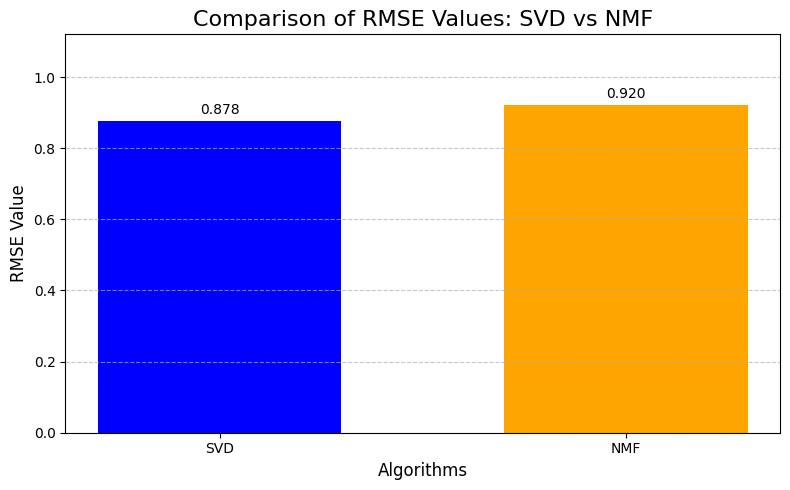

In [66]:
import matplotlib.pyplot as plt

# Define RMSE values for SVD and NMF
algorithms = ['SVD', 'NMF']
rmse_values = [accuracy.rmse(predictions_svd, verbose=False),
               accuracy.rmse(predictions_nmf, verbose=False)]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(algorithms, rmse_values, color=['blue', 'orange'], width=0.6)

# Add plot details
plt.title('Comparison of RMSE Values: SVD vs NMF', fontsize=16)
plt.ylabel('RMSE Value', fontsize=12)
plt.xlabel('Algorithms', fontsize=12)
plt.ylim(0, max(rmse_values) + 0.2)  # Extend y-axis for clarity

# Annotate RMSE values on top of the bars
for i, value in enumerate(rmse_values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the chart
plt.show()
